In [0]:
#Name: Shreyas Patil
#USC ID Number: 3220932311
#USC Email: shreyasp@usc.edu
#Submission Date: 4/7/2019

import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import numpy as np
import matplotlib.pyplot as plt
use_cuda = True

Load dataset

In [0]:
transform = transforms.Compose([transforms.ToTensor()])

trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=25, shuffle=True, num_workers=6)

testloader = torch.utils.data.DataLoader(testset, batch_size=25, shuffle=False, num_workers=6)

Define network

In [0]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=5, stride=1)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x))
        return x 
network = Net()

Loss and optimization method

In [0]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(network.parameters(), lr=0.01, momentum=0.9)

Training and Testing

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


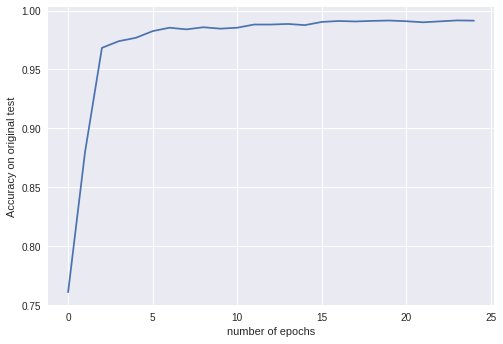

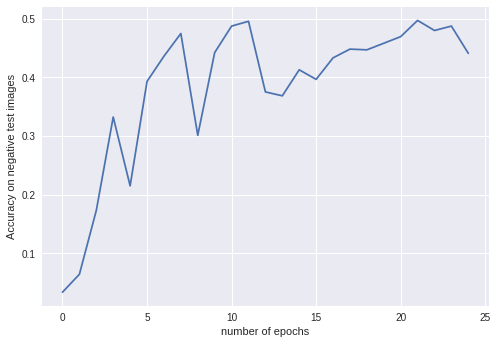

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
network = network.to(device)
accuracy11 = []
accuracy12 = []
for epoch in range(25):
    total1 = 0
    correct1 = 0
    total2 = 0
    correct2 = 0
    for i, data in enumerate(trainloader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = network(inputs)
        loss = criterion(outputs, labels)
        loss.backward()           #Calculating the gradients
        optimizer.step()     #Updates the parameters
        
    for testdata in testloader:
        data, labels = testdata
        data, labels = data.to(device), labels.to(device)
        outputs = network(data)
        _, predicted = torch.max(outputs, 1)
        total1 += labels.size(0)
        correct1 += (predicted == labels).sum().item()    
      
    
    accuracy11.append(correct1 / total1)
        
    
    for testdata in testloader:
      testdata[0] = 1 - testdata[0]
      data, labels = testdata
      data, labels = data.to(device), labels.to(device)
      outputs = network(data)
      _, predicted = torch.max(outputs, 1)
      total2 += labels.size(0)
      correct2 += (predicted == labels).sum().item()
      
    accuracy12.append(correct2 / total2)
    
plt.plot(range(25), accuracy11) 
plt.xlabel("number of epochs")
plt.ylabel("Accuracy on original test")
plt.show()

plt.plot(range(25), accuracy12)
plt.xlabel("number of epochs")
plt.ylabel("Accuracy on negative test images")
plt.show()
       

In [0]:
accuracy12


[0.0334,
 0.064,
 0.173,
 0.3323,
 0.2149,
 0.3931,
 0.4361,
 0.4749,
 0.3011,
 0.4423,
 0.4875,
 0.4957,
 0.3752,
 0.3685,
 0.4129,
 0.3966,
 0.4333,
 0.4482,
 0.447,
 0.4582,
 0.4695,
 0.4972,
 0.48,
 0.4875,
 0.441]

C)2) 

Load dataset

In [0]:
transform = transforms.Compose([transforms.ToTensor()])

trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=100, shuffle=True, num_workers=6)

testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=6)

Define network

In [0]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=2)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x))
        return x 
    
      
network = Net()

In [0]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(network.parameters(), lr=0.01, momentum=0.9)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


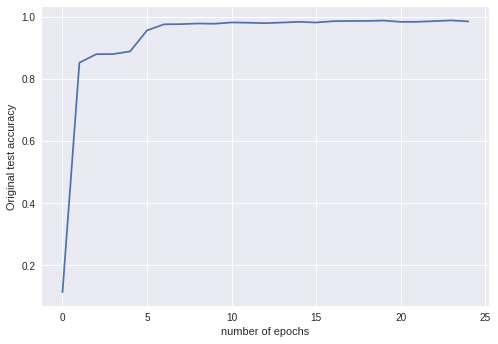

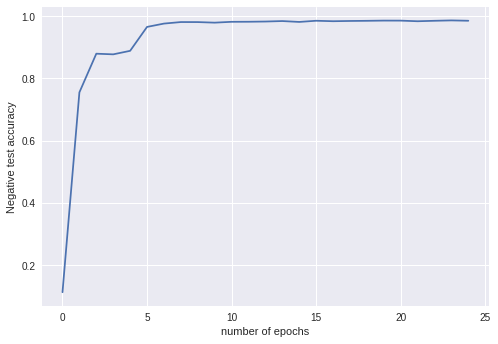

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
network = network.to(device)
accuracy11 = []
accuracy12 = []
for epoch in range(25):
    total1 = 0
    correct1 = 0
    total2 = 0
    correct2 = 0
    for i, data in enumerate(trainloader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = network(inputs)
        loss = criterion(outputs, labels)
        loss.backward()           #Calculating the gradients
        optimizer.step()     #Updates the parameters
    
    
        data[0] = 1 - data[0]
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = network(inputs)
        loss = criterion(outputs, labels)
        loss.backward()           #Calculating the gradients
        optimizer.step()     #Updates the parameters
        
    with torch.no_grad():
      for testdata in testloader:
        data, labels = testdata
        data, labels = data.to(device), labels.to(device)
        outputs = network(data)
        _, predicted = torch.max(outputs, 1)
        total1 += labels.size(0)
        correct1 += (predicted == labels).sum().item()
      
    accuracy11.append(correct1 / total1)
    
            
    with torch.no_grad():  
      for testdata in testloader:
        testdata[0] = 1 - testdata[0]
        data, labels = testdata
        data, labels = data.to(device), labels.to(device)
        outputs = network(data)
        _, predicted = torch.max(outputs, 1)
        total2 += labels.size(0)
        correct2 += (predicted == labels).sum().item()
      
    accuracy12.append(correct2 / total2)
    
plt.plot(range(25), accuracy11) 
plt.xlabel("number of epochs")
plt.ylabel("Original test accuracy")
plt.show()

plt.plot(range(25), accuracy12)
plt.xlabel("number of epochs")
plt.ylabel("Negative test accuracy")
plt.show()

In [0]:
accuracy12

[0.1135,
 0.7554,
 0.8796,
 0.8775,
 0.8888,
 0.9656,
 0.9763,
 0.9812,
 0.9811,
 0.9793,
 0.982,
 0.9822,
 0.9829,
 0.9844,
 0.9816,
 0.9854,
 0.9839,
 0.9847,
 0.9852,
 0.9859,
 0.9858,
 0.9838,
 0.9853,
 0.9865,
 0.9854]